# Team 10 - Unsupervised Learning Predict

© Explore Data Science Academy

---

## Team Members

 - [Mulalo Malange](https://www.linkedin.com/in/mulalo-malange-399923a6/?originalSubdomain=za)
 - [Rebecca Kekana](https://www.linkedin.com/in/rebeccakekana/)
 - [Thandiwe Khalaki](https://www.linkedin.com/in/thandiwekhalaki/?originalSubdomain=za)
 - [Njabulo Nyembe](https://www.linkedin.com/in/njabulo-nyembe/?originalSubdomain=za)
 - [John Siphiwe Seelamo]


## Introduction: Movie Recommendation Challenge

*Insert Intro
 

## Predict Overview

*Insert Overview


<a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Exploratory Data Analysis (EDA)</a>

<a href=#four>4. Data Preprocessing </a>

<a href=#five>5. Feature Engineering</a>

<a href=#six>6. Modeling</a>

<a href=#seven>7. Model Performance</a>

<a href=#eight>8. Model Explanations</a>

 <a id="one"></a>
## 1. Importing Packages

In this section we import the necessary libraries needed for Data Analysis, Data Preprocessing, Data Visualization, Feature Engineering and Model Building.

In [1]:
# Install packages here
# Packages for data processing
import numpy as np
import pandas as pd
import datetime
from sklearn import preprocessing
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import re
from scipy.sparse import csr_matrix
import scipy as sp


In [2]:
# Packages for modeling
from surprise import Reader
from surprise import Dataset
from surprise import KNNWithMeans
from surprise import KNNBasic
from surprise.model_selection import GridSearchCV
from surprise.model_selection import cross_validate, train_test_split
from surprise import SVD,accuracy
from surprise import SVDpp
from surprise import NMF
from surprise import SlopeOne
from surprise import CoClustering
import heapq

In [3]:
# Packages for model evaluation
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from time import time

# Package to suppress warnings
import warnings
warnings.filterwarnings("ignore")

# Packages for saving models
import pickle

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
from wordcloud import WordCloud
%matplotlib inline

<a id="two"></a>
## 2. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

Load the Train and Test datasets as well as other relevent datasets from the github repository

In [5]:
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv") 
movies_df = pd.read_csv("movies.csv")
tags_df = pd.read_csv("tags.csv")
links_df = pd.read_csv("links.csv")

genome_scores_df = pd.read_csv("genome_scores.csv")
genome_tags_df = pd.read_csv("genome_tags.csv")
imdb_data_df = pd.read_csv("imdb_data.csv")

In [6]:
df_shapes = {'Train': df_train.shape,
            'Test': df_test.shape,
            'Movies': movies_df.shape,
            'IMDB': imdb_data_df.shape,
            'Links': links_df.shape,
            'Tags': tags_df.shape,
            'Genome scores': genome_scores_df.shape,
            'Genome tags': genome_tags_df.shape,
}

df_shape = pd.DataFrame(list(df_shapes.items()), columns=['Data Set', 'Shape'])
df_shape

,Data Set,Shape
0,Train,"(10000038, 4)"
1,Test,"(5000019, 2)"
2,Movies,"(62423, 3)"
3,IMDB,"(27278, 6)"
4,Links,"(62423, 3)"
5,Tags,"(1093360, 4)"
6,Genome scores,"(15584448, 3)"
7,Genome tags,"(1128, 2)"


# EDA

In [7]:
#show full value of dataframe
pd.set_option("display.max_rows", None, "display.max_columns", None)

In [8]:
#show full value of dataframe
pd.set_option("display.max_rows", None, "display.max_columns", None)

# Display the first 5 entries in each dataframe 
display(df_train.head())
display(df_test.head())
display(movies_df.head())
display(imdb_data_df.head())
display(links_df.head())
display(tags_df.head())
display(genome_scores_df.head())
display(genome_tags_df.head())

,userId,movieId,rating,timestamp
0,5163,57669,4.0,1518349992
1,106343,5,4.5,1206238739
2,146790,5459,5.0,1076215539
3,106362,32296,2.0,1423042565
4,9041,366,3.0,833375837


,userId,movieId
0,1,2011
1,1,4144
2,1,5767
3,1,6711
4,1,7318


,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


,movieId,title_cast,director,runtime,budget,plot_keywords
0,1,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,John Lasseter,81.0,"$30,000,000",toy|rivalry|cowboy|cgi animation
1,2,Robin Williams|Jonathan Hyde|Kirsten Dunst|Bra...,Jonathan Hensleigh,104.0,"$65,000,000",board game|adventurer|fight|game
2,3,Walter Matthau|Jack Lemmon|Sophia Loren|Ann-Ma...,Mark Steven Johnson,101.0,"$25,000,000",boat|lake|neighbor|rivalry
3,4,Whitney Houston|Angela Bassett|Loretta Devine|...,Terry McMillan,124.0,"$16,000,000",black american|husband wife relationship|betra...
4,5,Steve Martin|Diane Keaton|Martin Short|Kimberl...,Albert Hackett,106.0,"$30,000,000",fatherhood|doberman|dog|mansion


,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


,userId,movieId,tag,timestamp
0,3,260,classic,1439472355
1,3,260,sci-fi,1439472256
2,4,1732,dark comedy,1573943598
3,4,1732,great dialogue,1573943604
4,4,7569,so bad it's good,1573943455


,movieId,tagId,relevance
0,1,1,0.02875
1,1,2,0.02375
2,1,3,0.06250
3,1,4,0.07575
4,1,5,0.14075


,tagId,tag
0,1,007
1,2,007 (series)
2,3,18th century
3,4,1920s
4,5,1930s


In [9]:
movies_df['year'] = movies_df['title'].str.extract("\((.*)\)") 

In [10]:
movies_df['title'] = movies_df['title'].apply(lambda x: x[:-7])

In [11]:
movies_df.head()

,movieId,title,genres,year
0,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1995
1,2,Jumanji,Adventure|Children|Fantasy,1995
2,3,Grumpier Old Men,Comedy|Romance,1995
3,4,Waiting to Exhale,Comedy|Drama|Romance,1995
4,5,Father of the Bride Part II,Comedy,1995


In [12]:
genome_scores_df['relevance'].min()

0.0002499999999999

In [13]:
genome_scores_df['relevance'].max()

1.0

In [14]:
# Convert object data types to strings for string handling
def change_data_types(data):
    for i in data.columns:
        if data[i].dtypes == "O":
            data[i] = data[i].astype(str)
    return data           

In [16]:
df_train =change_data_types(df_train)
df_test = change_data_types(df_test)
movies_df = change_data_types(movies_df)
imdb_data_df = change_data_types(imdb_data_df)
links_df = change_data_types(links_df)
tags_df = change_data_types(tags_df)
genome_scores_df = change_data_types(genome_scores_df)
genome_tags_df = change_data_types(genome_tags_df)

In [17]:
#preprocessor
def clean_data(df, column):
    
    # Turn all words to lowercase
    df[column] = df[column].str.lower()

    # Discarding the pipes between words
    df[column] = df[column].map(lambda x: x.split('|'))
    df[column] = df[column].apply(lambda x: " ".join(x))
    
    return df

In [18]:
def join_names(df, column):
    # Discarding the pipes between the full names and getting only the first ten names
    df[column] = df[column].map(lambda x: x.split('|')[:11])   
    
    # Removing spaces between names
    df[column] = df[column].apply(lambda x: "".join(x.lower() for x in x.split()))
    df[column] = df[column].apply(lambda x: "".join(x.lower() for x in x.split()))
    
    return df

In [19]:
movies_df = clean_data(movies_df, 'genres')

Movie Genre Frequency


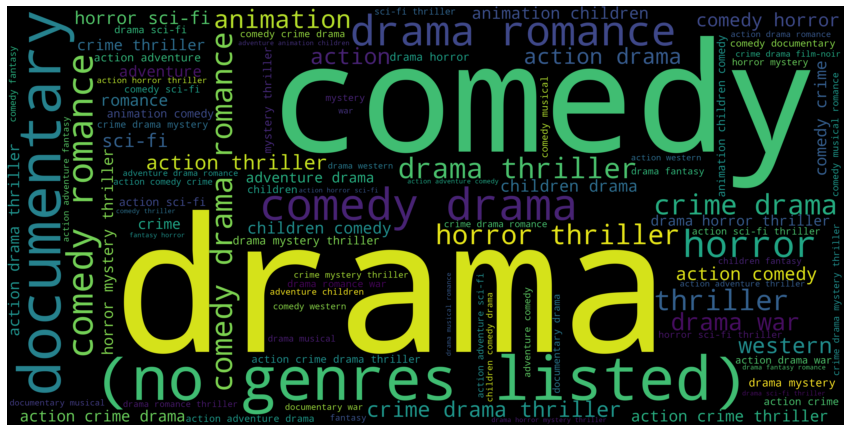

In [30]:
# Calculate number of movies by genre
genre = movies_df['genres'].value_counts()

# Create a word cloud with max 100 
print("Movie Genre Frequency")
wordcloud = WordCloud(max_words=100, background_color='black', height=2000, width=4000).generate_from_frequencies(genre)
plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [31]:
# Which genre do most released movies fall under? We don't have a clear indictation of how these movie genres are rated yet. 

In [32]:
movies = pd.merge(df_train, movies_df, on='movieId', how='outer')

In [33]:
movies.head()

,userId,movieId,rating,timestamp,title,genres,year
0,5163.0,57669,4.0,1.518350e+09,In Bruges,comedy crime drama thriller,2008
1,87388.0,57669,3.5,1.237455e+09,In Bruges,comedy crime drama thriller,2008
2,137050.0,57669,4.0,1.425632e+09,In Bruges,comedy crime drama thriller,2008
3,120490.0,57669,4.5,1.408229e+09,In Bruges,comedy crime drama thriller,2008
4,50616.0,57669,4.5,1.446942e+09,In Bruges,comedy crime drama thriller,2008


In [34]:
movies.shape

(10014248, 7)

In [50]:
# Average rating per movie
movies.groupby(by='title')['rating'].mean().sort_values(ascending=False).head()

title
Wrestle                            5.0
Adios Carmen                       5.0
Great Texas Dynamite Chase, The    5.0
The Living World                   5.0
Grantham and Rose                  5.0
Name: rating, dtype: float64

In [49]:
# Number of ratings per movie
movies.groupby(by='title')['rating'].count().sort_values(ascending=False).head()

title
Shawshank Redemption, The    32831
Forrest Gump                 32383
Pulp Fiction                 31697
Silence of the Lambs, The    29444
Matrix, The                  29014
Name: rating, dtype: int64

In [51]:
movies.groupby(by='title')['rating'].count().sort_values(ascending=False).tail()

title
The Conduit                                 0
The Confession: Living the War on Terror    0
Human Touch                                 0
The Confessions of Bernhard Goetz           0
The Ice Follies of 1939                     0
Name: rating, dtype: int64

In [56]:
movies_summ = pd.DataFrame(movies.groupby(by='title')['rating'].mean())

In [57]:
movies_summ['No. of people Rated'] = movies.groupby(by='title')['rating'].count()

In [63]:
movies_summ.sort_values(by=['rating'], ascending=False).head()

,rating,No. of people Rated
title,,
Wrestle,5.0,1
Adios Carmen,5.0,1
"Great Texas Dynamite Chase, The",5.0,1
The Living World,5.0,1
Grantham and Rose,5.0,1


In [64]:
movies_summ.sort_values(by=['No. of people Rated'], ascending=False).head()

,rating,No. of people Rated
title,,
"Shawshank Redemption, The",4.417624,32831
Forrest Gump,4.047216,32383
Pulp Fiction,4.195097,31697
"Silence of the Lambs, The",4.144172,29444
"Matrix, The",4.154253,29014


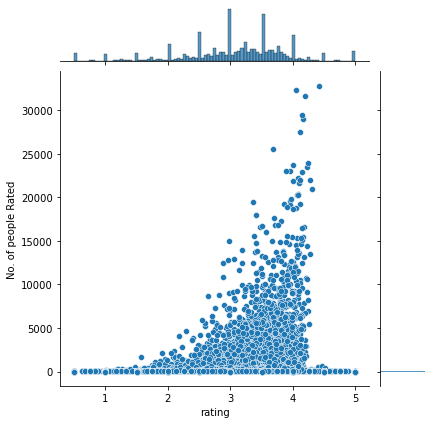

In [66]:
sns.jointplot(x=movies_summ['rating'],y=movies_summ['No. of people Rated'])

In [69]:
movies.head(10)

,userId,movieId,rating,timestamp,title,genres,year
0,5163.0,57669,4.0,1.518350e+09,In Bruges,comedy crime drama thriller,2008
1,87388.0,57669,3.5,1.237455e+09,In Bruges,comedy crime drama thriller,2008
2,137050.0,57669,4.0,1.425632e+09,In Bruges,comedy crime drama thriller,2008
3,120490.0,57669,4.5,1.408229e+09,In Bruges,comedy crime drama thriller,2008
4,50616.0,57669,4.5,1.446942e+09,In Bruges,comedy crime drama thriller,2008
5,99887.0,57669,0.5,1.448839e+09,In Bruges,comedy crime drama thriller,2008
6,120194.0,57669,4.5,1.479382e+09,In Bruges,comedy crime drama thriller,2008
7,847.0,57669,3.5,1.232894e+09,In Bruges,comedy crime drama thriller,2008
8,47201.0,57669,4.5,1.464351e+09,In Bruges,comedy crime drama thriller,2008
9,94499.0,57669,4.5,1.316689e+09,In Bruges,comedy crime drama thriller,2008


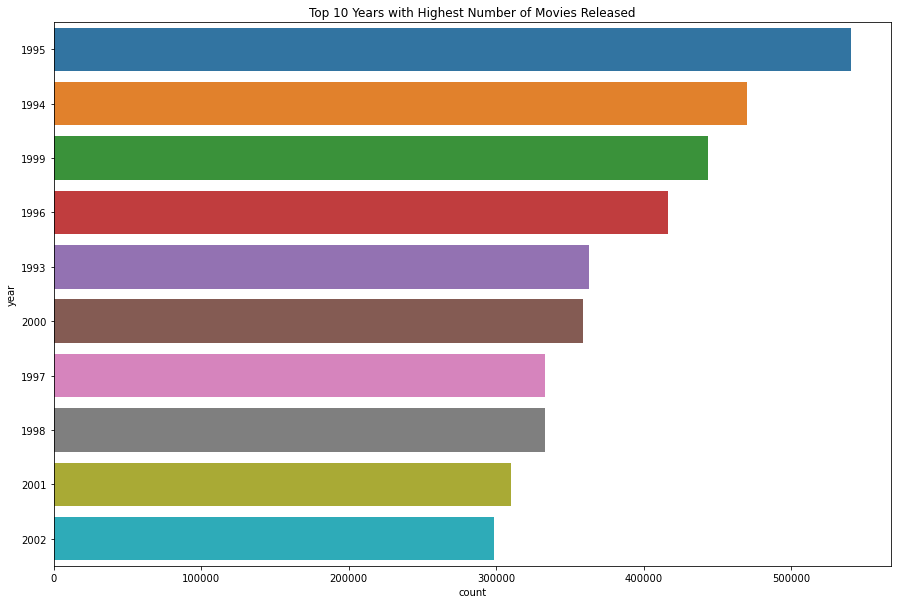

In [60]:
#plots for years
plt.figure(figsize=(15, 10))
ax = sns.countplot(y = movies['year'], data = movies, order = movies['year'].value_counts().index[0:10] )

#add title
ax.set_title("Top 10 Years with Highest Number of Movies Released")
plt.show()

<AxesSubplot:>

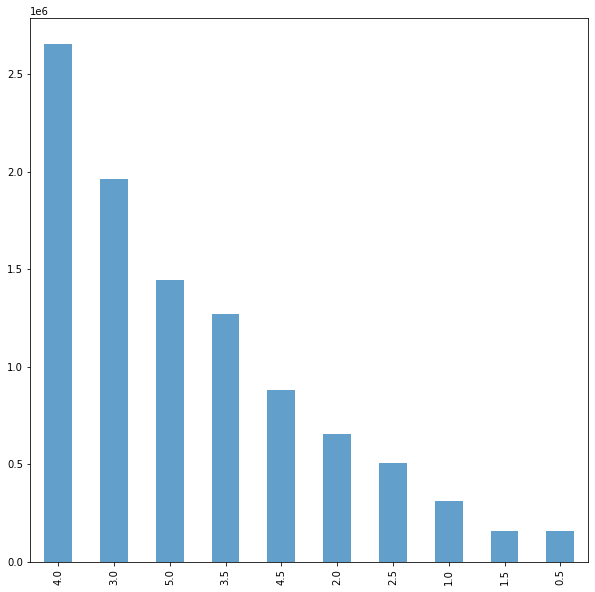

In [81]:
#Visualize overall rating by users
movies['rating'].value_counts().plot(kind='bar',alpha=0.7,figsize=(10,10))

# Feature Engineering

Turn lists of features into numerical representations

In [ ]:
sample_df = pd.read_csv("sample_submission.csv")

In [ ]:
sample_df.head()

In [ ]:
data = Dataset.load_from_df(df_train[['userId', 'movieId', 'rating']], Reader())

In [ ]:
train_set, test_set = train_test_split(data, test_size=0.20)

In [ ]:
svd=SVD(n_epochs = 30, n_factors = 200, init_std_dev = 0.05, random_state=42)

In [ ]:
#Fitting the model
svd.fit(train_set)

In [ ]:
# Make predictions
test_pred= svd.test(test_set)

In [ ]:
#Evaluate model performance
rsme_collabo = accuracy.rmse(test_pred,verbose=True)

In [ ]:
test = pd.read_csv('test.csv')
test.sample(10)



In [ ]:
#Predicting the rating for each user and movie
ratings=[]
for x,y in test.itertuples(index=False):
    output=svd.predict(x,y)
    ratings.append(output)
    
output_df=pd.DataFrame(ratings)[['uid','iid','est']]
output_df['ID']=output_df['uid'].astype(str) + '_' + output_df['iid'].astype(str)
output_df=output_df[['ID','est']]
output_df.head()

In [ ]:
#Creating the "results" dataframe and convert to csv
results = pd.DataFrame({"Id":output_df['ID'],"rating": output_df['est']})
results.to_csv("SVD.csv", index=False)

In [ ]:
Team_10_submission = pd.DataFrame({'id': results.Id, 'rating': results.rating})
Team_10_submission.to_csv('submission.csv', index=False)